# Gradient Descent

## 1. Minimizing a Single Variable Function

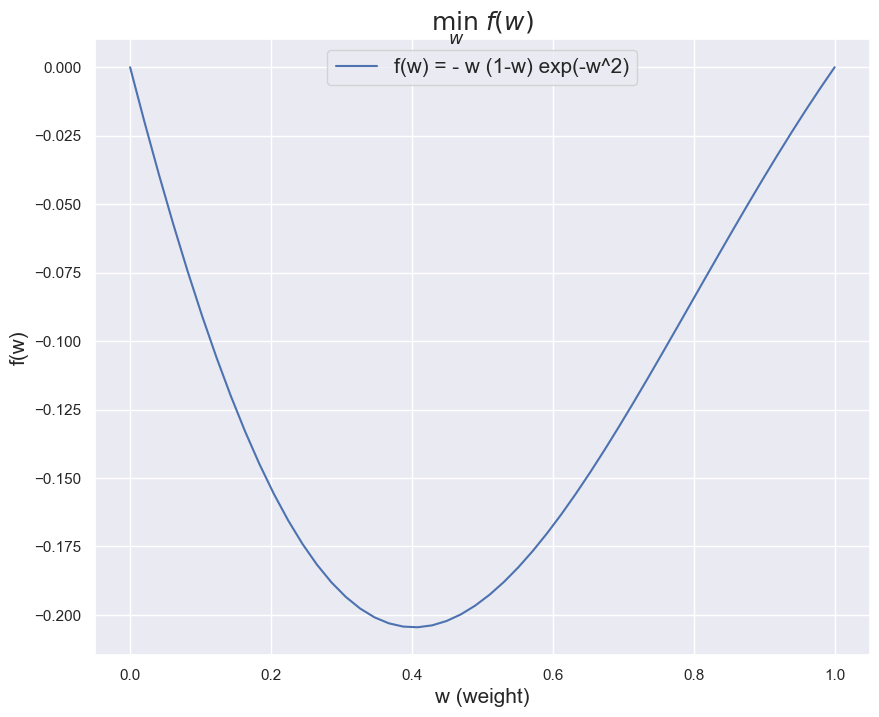

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set Seaborn theme for plots
sns.set_theme()

# Define test function for experimenting
def f(w):
    return -w*(1-w)*np.exp(-w**2)

# Define domain variables for plotting f
domain = np.linspace(0, 1, 50)

# Plot the function f(w)
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = - w (1-w) exp(-w^2)")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(w)$", fontsize = 18)
plt.show()

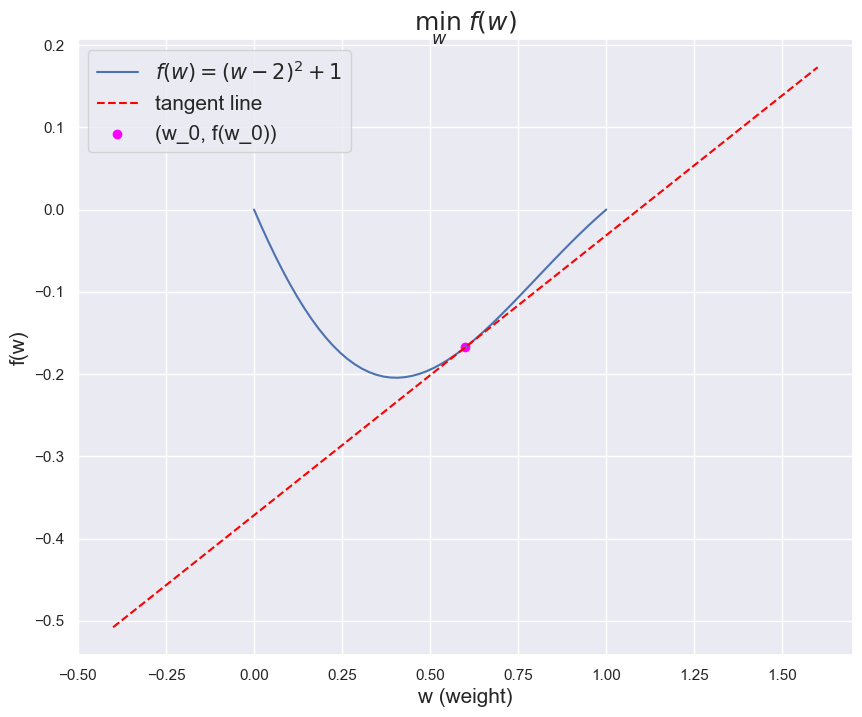

In [51]:
def df(w): 
    return np.exp(-w**2)*(-2*w**3 + 2*w**2 + 2*w -1)

# Choose w_0
w_0 = 0.6

# Define tangent line function for visualization
def tangent_line(w_i, function, derivative, i = 0, color = "magenta", show = True):
    # Define tangent line
    # y = m*(x - x1) + y1
    def line(w):
        return derivative(w_i)*(w - w_i) + function(w_i)

    wrange = np.linspace(w_i - 1, w_i + 1, 10)
    if show:
        plt.plot(wrange,
            line(wrange), 
            '--', 
            linewidth = 1.5, 
            color = "red", 
            label = "tangent line")
    plt.scatter([w_i], [function(w_i)], color = color, label = f"(w_{i}, f(w_{i}))")

# Plot the figure
plt.figure(figsize = (10, 8))
# Plot the function
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")
# Visualize the tangent line
tangent_line(w_0, f, df)

# Label the figure
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("$\min_w$ $f(w)$", fontsize = 18)
plt.show()

w_0 = 0.6
w_1 = 0.32762716230186945


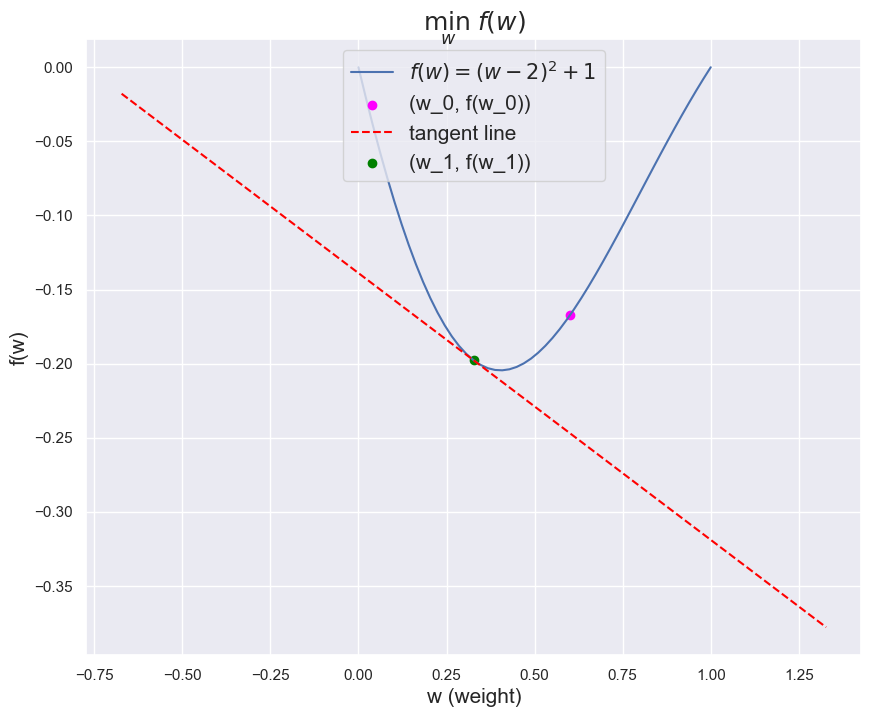

In [52]:
# Initialize choice of w
w_0 = 0.6

# Set learning rate 
alpha = .8

# Moving in the opposite direction of the derivative at w_0
w_1 = w_0 - alpha*df(w_0)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(w)$", fontsize = 18)
plt.show()

w_0 = 0.6 | df(w_0) = 0.34046604712266315
w_1 = 0.32763 | df(w_1) = -0.1800045534356989
w_2 = 0.47163 | df(w_2) = 0.14275531780533565
w_3 = 0.35743 | df(w_3) = -0.10645730457100558
w_4 = 0.44259 | df(w_4) = 0.08514019564580967
w_5 = 0.37448 | df(w_5) = -0.06570751902781033
w_6 = 0.42705 | df(w_6) = 0.05255581583258083
w_7 = 0.385 | df(w_7) = -0.04111055811675514
w_8 = 0.41789 | df(w_8) = 0.032826660637513806
w_9 = 0.39163 | df(w_9) = -0.02584326681443256
w_10 = 0.4123 | df(w_10) = 0.02059948402377892
w_11 = 0.39582 | df(w_11) = -0.01627211553603776
w_12 = 0.40884 | df(w_12) = 0.012952292596385069
w_13 = 0.39848 | df(w_13) = -0.010250744718082136
w_14 = 0.40668 | df(w_14) = 0.008151260379150918
w_15 = 0.40016 | df(w_15) = -0.006458211741570482
w_16 = 0.40533 | df(w_16) = 0.005132012906055628
w_17 = 0.40122 | df(w_17) = -0.004068759978892825
w_18 = 0.40448 | df(w_18) = 0.0032317959013881134
w_19 = 0.40189 | df(w_19) = -0.0025632631450006257
w_20 = 0.40394 | df(w_20) = 0.00203539959713414

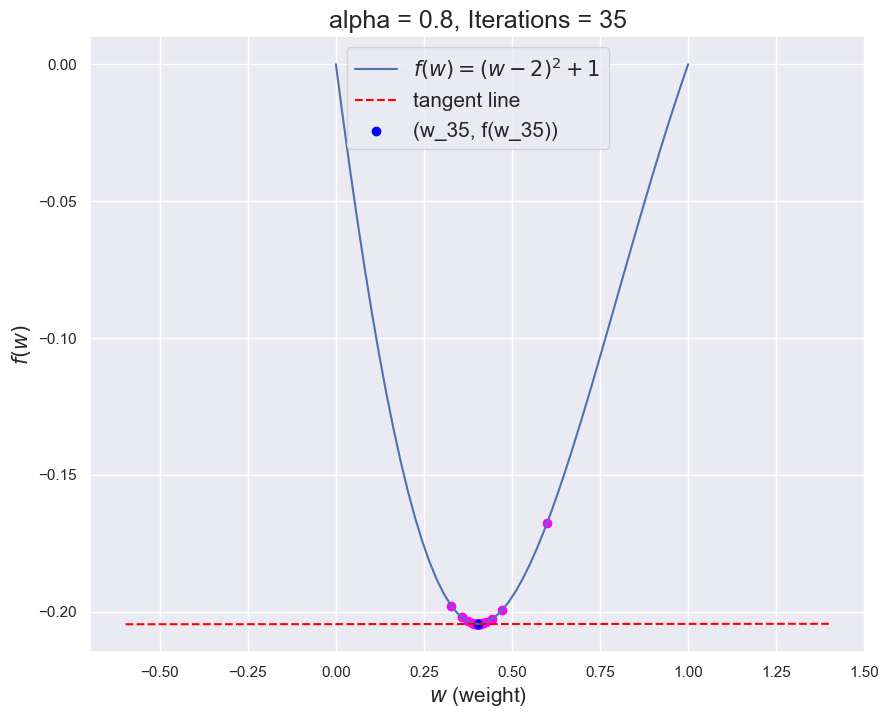

In [53]:
def derivative_descent(derivative, alpha = 0.8, w_0 = 0.6, max_iter = 1_000):
    W = [w_0]
    i = 0
    while abs(derivative(W[-1])) > 0.0001 and i < max_iter:
        w_new = W[-1] - alpha*df(W[-1])
        W.append(w_new)
        i += 1
    W = np.array(W)

    return W

W = derivative_descent(df)

for i, w in enumerate(W):
    print(f"w_{i} = {np.round(w, decimals = 5)} | df(w_{i}) = {df(w)}")
print("")


# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")
plt.scatter(W, f(W), color = "magenta")
tangent_line(W[-1], f, df, i = len(W), color = "blue")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)
plt.show()

### 1.1 Testing different choices of the Learning Rate $\alpha$

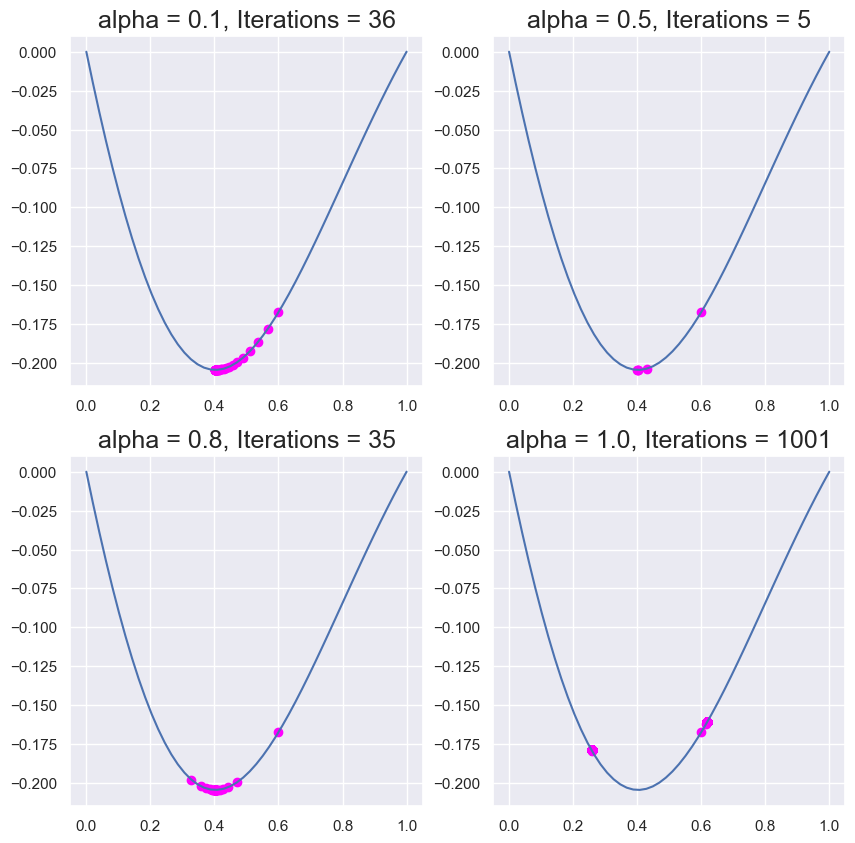

In [54]:
# Possible choices of learning rate 
alphas = [0.1, 0.5, 0.8, 1.0]

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    W = derivative_descent(df, alpha = alpha)
    ax.plot(domain, f(domain))
    ax.scatter(W, f(W), color = "magenta")
    ax.set_title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)

## 2. Minimizing Functions of Several Variables

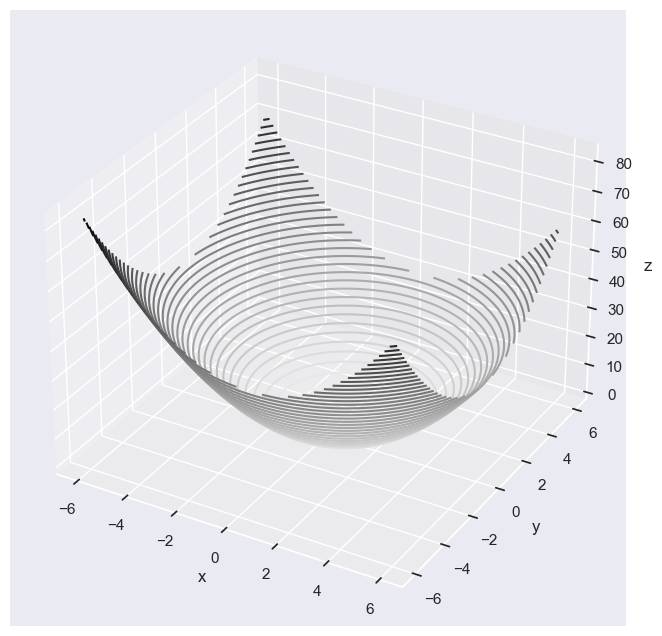

In [55]:
from mpl_toolkits import mplot3d

def f(w_0, w_1):
    return w_0 * (w_0 - 1) + w_1 * (w_1 - 1)

x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

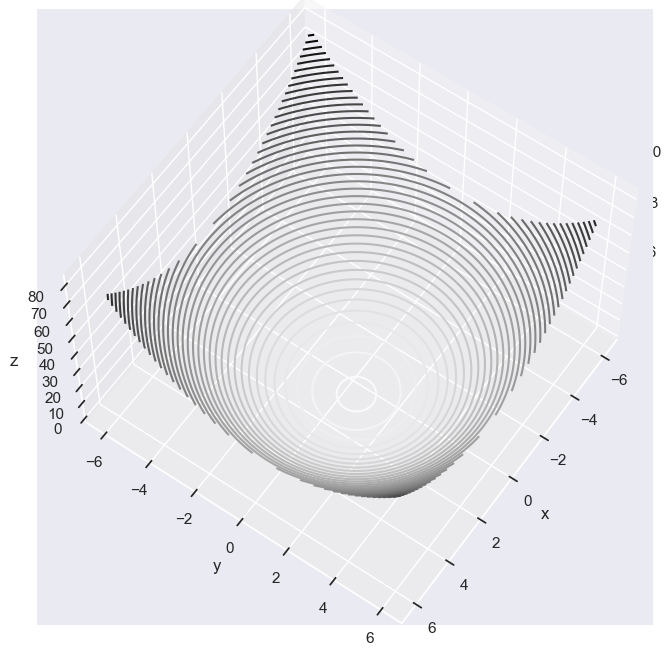

In [56]:
x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax.view_init(60, 35)
plt.show()

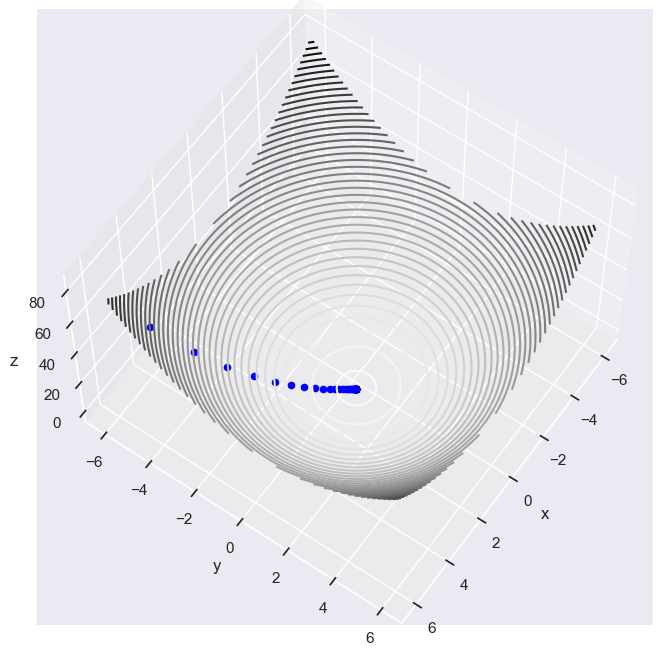

In [57]:
def df(w):
    grad = [2*w[0]-1, 2*w[1]-1]
    return np.array(grad)

def gradient_descent(derivative, W, alpha = 0.8, max_iter = 1_000):
    i = 0
    W_hist = [W]
    while i < max_iter:
        W = W - alpha*df(W)
        i += 1
        W_hist.append(W)

    return W_hist

W = gradient_descent(df, np.array([5.0, -5.0]), alpha = 0.1, max_iter=500)

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
for i in range(len(W)):
    ax.scatter3D([W[i][0]], 
                 [W[i][1]], 
                 [f(W[i][0], W[i][1])], color = "blue")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)
plt.show()